# *TCP_3_way_handshake & 4_way_handshake*

---

## **1. 프로토콜이란?**
- 통신 프로토콜 또는 통신 규약은 컴퓨터나 원거리 통신 장비 사이에서 메세지를 주고 받는 양식과 규칙의 체계이다.
- 즉, 통신 규약 및 약속 = 규칙


#### 1. 프로토콜 양식 예시

- HTTP - 텍스트 기반   

    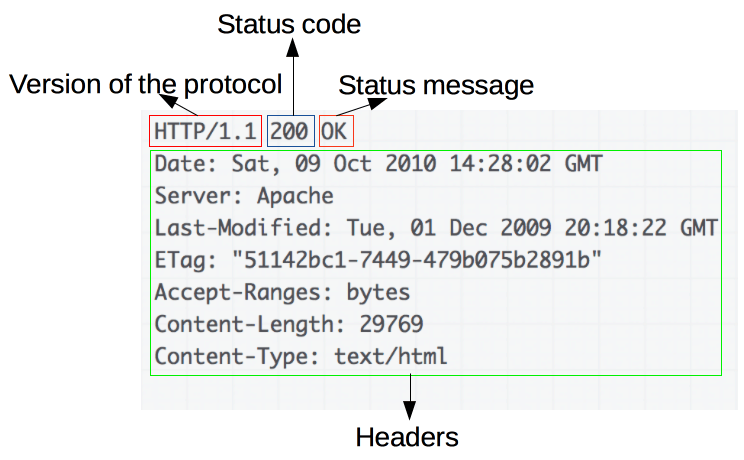

- TCP or UDP 프로토콜 - 원시 바이너리 데이터 기반

    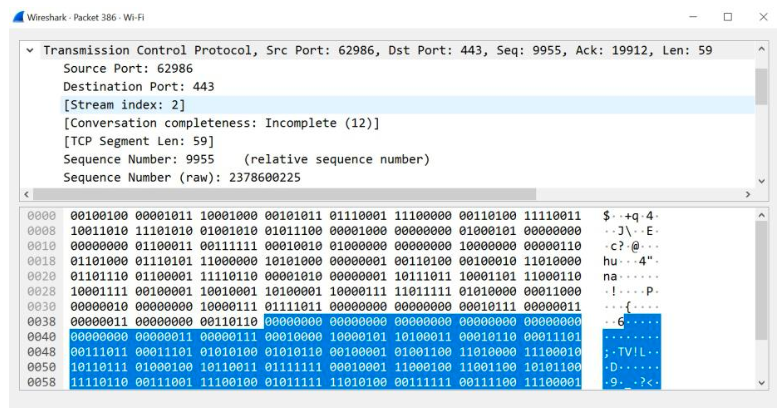

- UART 프로토콜 - 전압 수준을 사용 (전압 낮음 - 0, 전압 높음 - 1)

    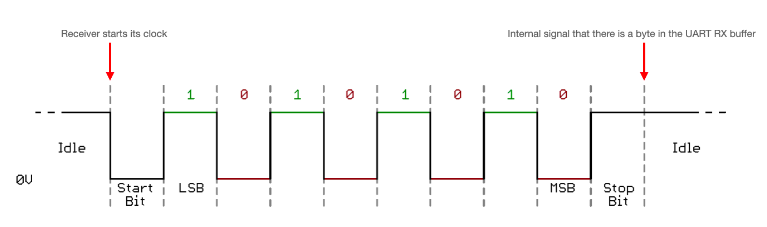


#### 2. 프로토콜의 종류

1. 물리 계층(Physical Layer)

    - 물리적인 신호를 전송하기 위한 계층으로, 전압, 전류, 빛 등의 물리적 신호를 다룬다.
    - Ethernet, USB, HDMI

2. 데이터 링크 계층(Data Link Layer)

    - 물리 계층에서 전송된 비트(Bit)를 물리적인 매체에 오류 없이 전달하기 위한 계층이다.
    - Ethernet, Wi-Fi, PPP(Point-to-Point Protocol)

3. 네트워크 계층(Network Layer)
    - 데이터 패킷의 경로 선택 및 라우팅을 관리하는 계층으로, IP 주소를 사용한다.
    - IP(Internet Protocol), ICMP(Internet Control Message Protocol), OSPF(Open Shortest Path First)

4. 전송 계층(Transport Layer)
    - 데이터 전송의 신뢰성과 연결 관리를 제공하는 계층으로, 포트(Port) 번호를 사용하여 애플리케이션 간 통신을 관리한다.
    - TCP(Transmission Control Protocol), UDP(User Datagram Protocol)

5. 세션 계층(Session Layer)
    - 데이터 교환의 세션을 설정, 관리, 종료하는 역할을 한다. 세션 복원 및 다중 세션 관리 기능을 제공한다.
    - NetBIOS, SAP, SDP, NWLink

6. 표현 계층(Presentation Layer)
    - 데이터의 인코딩, 암호화 및 변환을 처리하는 계층으로, 데이터 형식 및 구문을 다룬다.
    - ASCII, MPEG, JPEG, MIDI

7. 응용 계층(Application Layer)
    - 최종 사용자와 상호작용하기 위한 응용 프로그램과 통신하기 위한 계층으로, 다양한 응용 프로토콜 및 서비스를 제공한다.
    - HTTP, FTP, SMTP, DNS, SSH, WebSocket


#### 3. TCP(Transmission Control Protocol)
- 인터넷에서 데이터를 안정적으로 전송하기 위한 포로토콜, 전송 제어 프로토콜

##### 1. TCP Header
- TCP 헤더는 TCP 패킷의 제어 정보를 포함하고 있으며, 각 TCP 세그먼트의 시작 부분에 위치
- 이 헤더는 다양한 제어 정보와 데이터 전송을 조절하는 데 필수적인 요소들을 담고 있다.
- TCP 헤더는 일반적으로 최소 20바이트 크기를 가지며, 다음과 같은 필드로 구성

    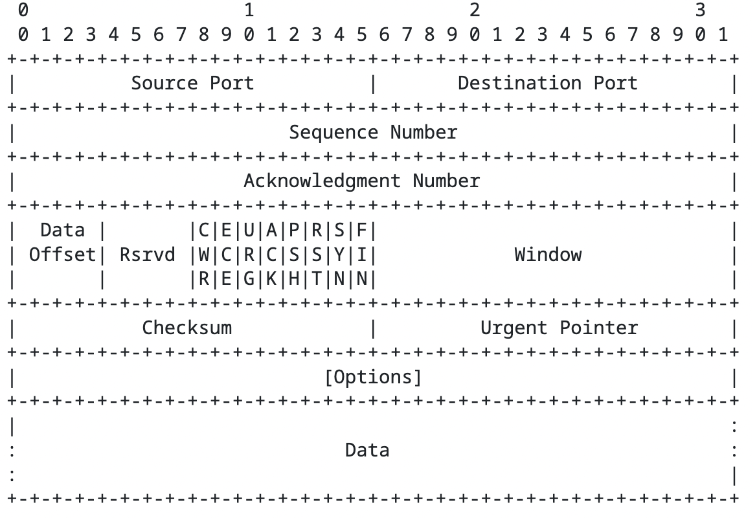
   
    1. Source Port (4비트): 송신자의 포트 번호를 나타낸다.

    2. Destination Port (4비트): 수신자의 포트 번호를 나타낸다.

    3. Sequence Number (4비트): 세그먼트 내 첫 번째 데이터 바이트의 시퀀스 번호, 데이터의 순서를 보장하고 데이터의 일부가 유실됐을 때 재전송을 관리하는 데 사용

    4. Acknowledgment Number (4비트): 수신자가 다음에 받기를 원하는 시퀀스 번호, 이는 이전에 성공적으로 수신한 데이터를 확인하는 용도로 사용

    5. Data Offset (4비트): TCP 헤더의 길이를 나타낸다. 이 필드는 헤더 뒤에 오는 데이터의 시작 위치를 지정

    6. Reserved (6비트): 현재 사용되지 않으며, 사용을 위해 예약하는 설정, 이 비트들은 항상 0으로 설정되어야 합니다.

    7. Flags (6비트): 다양한 제어 플래그를 포함하며, 각 플래그는 TCP 연결의 특정 상태나 동작을 나타낸다. 
    - 주요 Flag
        - URG (긴급): 긴급 포인터가 유효함을 나타낸다.
        - ACK (승인): 승인 번호 필드가 유효함을 나타낸다.
        - PSH (푸시): 수신 애플리케이션에 버퍼링 없이 이 데이터를 즉시 전달하라는 지시
        - RST (리셋): 연결을 초기화하거나 거부하는 데 사용된다.
        - SYN (동기화): 연결 설정 요청을 나타내며, 시퀀스 번호를 동기화하는 데 사용된다.
        - FIN (종료): 송신자가 더 이상 전송할 데이터가 없음을 나타내어 연결 종료를 요청

    8. Window Size (4비트): 수신 윈도우의 크기를 나타내며, 송신자가 보낼 수 있는 데이터의 양을 제어하는 데 사용

    9. Checksum (4비트): TCP 헤더와 데이터의 오류를 검사하는데 사용됩니다. 이는 데이터의 무결성을 보장하는 데 중요

    10. Urgent Pointer (4비트): URG 플래그가 설정되어 있을 때, 이 포인터는 긴급 데이터의 끝을 말한다.

    11. Options (가변 길이): 필요에 따라 추가 기능을 제공하기 위해 TCP 헤더에 포함될 수 있는 선택


##### 2. Code bit 세부 내용

1. SYN(Synchronization:동기화) - S : 연결 요청 패킷
    - TCP에서 세션을 성립할 때 가장 먼저 보내는 패킷, 시퀀스 번호를 임의적으로 설정하여 세션을 연결하는 데에 사용되며 초기에 시퀀스 번호를 보낸다.


2. ACK(Acknowledgement) - Ack : 응답 패킷
    - 상대방으로부터 패킷을 받았다는 걸 알려주는 패킷, 다른 플래그와 같이 출력되는 경우도 있음
    - 받는 사람이 보낸 사람 시퀀스 번호에 TCP 계층에서 길이 또는 데이터 양을 더한 것과 같은 ACK를 보낸다. 
    - ACK 응답을 통해 보낸 패킷에 대한 성공, 실패를 판단하여 재전송하거나 다음 패킷을 전송


3. RST(Reset) - R : 재연결 종료 패킷
    - 재설정(Reset)을 하는 과정이며 양방향에서 동시에 일어나는 중단 작업, 비정상적인 세션 연결 끊기에 해당한다.
    - 이 패킷을 보내는 곳이 현재 접속하고 있는 곳과 즉시 연결을 끊고자 할 때 사용


4. PSH(Push) - P : 밀어 넣기 패킷

    - 텔넷(TELNET)과 같은 상호작용이 중요한 프로토콜의 경우 빠른 응답이 중요한데, 이때 받은 데이터를 즉시 목적지인 OSI 7 Layer의 Application 계층으로 바로 전송하도록 하는 FLAG
    - 대화형 트랙픽에 사용되는 것으로 버퍼가 채워지기를 기다리지 않고 데이터를 전달, 데이터는 버퍼링 없이 바로 위 계층이 아닌 7 계층의 응용프로그램으로 바로 전달


5. URG(Urgent) - U : 긴급 데이터 패킷
    - Urgent pointer 유효한 것인지를 나타낸다.
    - Urgent pointer란 전송하는 데이터 중에서 긴급히 전당 해야 할 내용이 있을 경우에 사용하고, 긴급한 데이터는 다른 데이터에 비해 우선순위가 당연히 높아야 한다.


6. FIN(Finish) - F : 연결 종료 요청
    - 세션 연결을 종료시킬 때 사용되며 더 이상 전송할 데이터가 없음을 나타난다.


<br>
<br>

---

## **2. TCP 3-way handshake**

- TCP는 안전한 통신을 위해 통신 시작 전, 사전 연결 작업을 수행함
- 목적지가 데이터를 받을 준비가 안 된 상황에서 데이터를 일방적으로 전송하면 목적지에서는 데이터를 정상적으로 처리할 수 없음
- 따라서, TCP 프로토콜은 이런 상황을 만들지 않기 위해 통신 전, 데이터를 안전하게 보내고 받을 수 있는지 미리 확인을 한다.
- 이 방법이 TCP 3 way HandShake이며, 3번의 패킷을 주고받으면서 통신을 준비하는 과정을 거친다.
   
    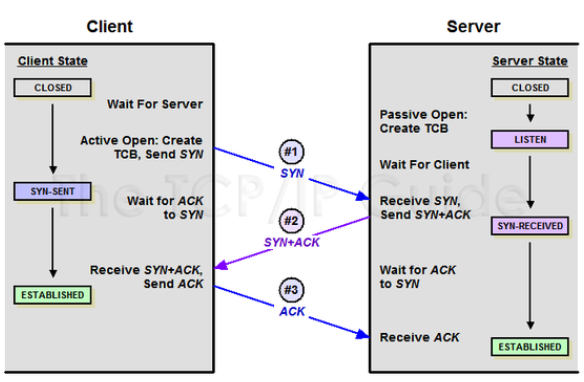   
   
    1. 서버에서는 서비스를 제공하기 위해 클라이언트의 접속을 받아들일 수 있는 LISTEN 상태로 대기

    2. 클라이언트에서 통신을 시도할 때 SYN 패킷을 보내는데, 클라이언트에서는 이 상태를 SYN-SENT라고 부름

    3. 클라이언트의 SYN을 받은 서버는 SYN-RECEIVE 상태가 되고, SYN-ACK로 응답

    4. SYN-ACK 응답을 받은 클라이언트는 ESTABLISHED 상태로 변경되고, 그에 대한 응답을 서버로 다시 보낸다.

    5. 서버에서도 클라이언트의 이 응답을 받고 ESTABLISHED상태로 변경

    6. 여기서 ESTABLISHED상태는 서버와 클라이언트 간의 연결이 성공적으로 완료되었음을 나타낸다.

---

## **3. TCP 4-way handshake**

- 3-way는 TCP의 연결을 시작하고 초기화할 때 사용하지만, 4-way는 세션을 종료하기 위해 수행되는 과정

    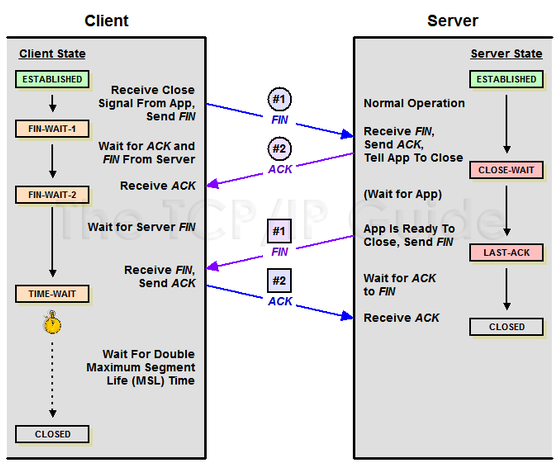

    1. 클라이언트가 서버에게 연결을 종료하겠다는 FIN플래그를 전송

    2. 서버는 일단 ACK 확인 메시지를 보내고 자신의 통신이 끝날 때까지 기다리는데 이 상태가 TIME_WAIT상태

    3. 서버가 통신이 끝났으면 연결이 종료되었다고 클라이언트에게 FIN플래그를 전송

    4. 클라이언트는 확인했다는 메시지를 보내고 연결은 종료